# Exploratory Data Analysis on Movies data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.pandas.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('movies.csv')
df.head(4)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,30-03-2022,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,24-03-2022,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger
2,335787,Uncharted,Action-Adventure,en,A young street-smart Nathan Drake and his wise...,3581.549,Columbia Pictures-Atlas Entertainment-PlayStat...,10-02-2022,120000000,395124202,116.0,Released,Fortune favors the bold.,7.2,1981,Tom Holland-Mark Wahlberg-Sophia Ali-Tati Gabr...,treasure-treasure hunt-based on video game
3,639933,The Northman,Action-Adventure-Drama-Fantasy-Thriller,en,Prince Amleth is on the verge of becoming a ma...,3451.658,New Regency Pictures-Focus Features-Perfect Wo...,07-04-2022,70000000,58120000,137.0,Released,Conquer your fate.,7.6,926,Alexander Skarsgård-Nicole Kidman-Claes Bang-E...,sword-father murder-prince-iceland-viking-nort...


In [3]:
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords'],
      dtype='object')

In [4]:
df.shape #(rows,columns)

(780113, 17)

In [5]:
# Basic inofrmation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780113 entries, 0 to 780112
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    780113 non-null  int64  
 1   title                 780109 non-null  object 
 2   genres                549671 non-null  object 
 3   original_language     780113 non-null  object 
 4   overview              653411 non-null  object 
 5   popularity            780113 non-null  float64
 6   production_companies  364964 non-null  object 
 7   release_date          717304 non-null  object 
 8   budget                780113 non-null  int64  
 9   revenue               780113 non-null  int64  
 10  runtime               738484 non-null  float64
 11  status                780113 non-null  object 
 12  tagline               116972 non-null  object 
 13  vote_average          780113 non-null  float64
 14  vote_count            780113 non-null  int64  
 15  

In [6]:
# correlation function
df.corr()

,id,popularity,budget,revenue,runtime,vote_average,vote_count
id,1.000000,-0.031864,-0.066562,-0.071041,0.000649,-0.392643,-0.102591
popularity,-0.031864,1.000000,0.152892,0.215703,-0.000085,0.074073,0.202574
budget,-0.066562,0.152892,1.000000,0.486155,-0.000049,0.054030,0.439215
revenue,-0.071041,0.215703,0.486155,1.000000,-0.000045,0.063404,0.761779
runtime,0.000649,-0.000085,-0.000049,-0.000045,1.000000,-0.001169,-0.000077
vote_average,-0.392643,0.074073,0.054030,0.063404,-0.001169,1.000000,0.101806
vote_count,-0.102591,0.202574,0.439215,0.761779,-0.000077,0.101806,1.000000


In [7]:
# Statistical Inference
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,vote_count
count,780113.000000,780113.000000,7.801130e+05,7.801130e+05,7.384840e+05,780113.000000,780113.000000
mean,526307.431716,1.919162,3.901217e+05,9.673702e+05,1.905858e+02,2.547586,27.111506
std,249784.101051,18.615032,7.869790e+06,1.974239e+07,8.285542e+04,3.194000,355.028453
min,2.000000,0.600000,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,331905.000000,0.600000,0.000000e+00,0.000000e+00,6.000000e+00,0.000000,0.000000
50%,533865.000000,0.600000,0.000000e+00,0.000000e+00,5.400000e+01,0.000000,0.000000
75%,732343.000000,1.341000,0.000000e+00,0.000000e+00,9.000000e+01,5.700000,2.000000
max,968161.000000,6852.303000,5.000000e+09,2.847246e+09,5.050505e+07,10.000000,31506.000000


In [8]:
# checking for NULL values
df.isnull().sum()

id                           0
title                        4
genres                  230442
original_language            0
overview                126702
popularity                   0
production_companies    415149
release_date             62809
budget                       0
revenue                      0
runtime                  41629
status                       0
tagline                 663141
vote_average                 0
vote_count                   0
credits                 237899
keywords                552009
dtype: int64

In [16]:
# Unique labels in each column

cols=df.columns.tolist()

for a in cols:
    print(a,":",len(df[a].unique()),'labels')

id : 662083 labels
title : 576447 labels
genres : 10620 labels
original_language : 165 labels
overview : 534945 labels
popularity : 20800 labels
production_companies : 141128 labels
release_date : 40971 labels
budget : 4118 labels
revenue : 12065 labels
runtime : 636 labels
status : 6 labels
tagline : 90148 labels
vote_average : 96 labels
vote_count : 3489 labels
credits : 414441 labels
keywords : 113558 labels


<AxesSubplot:xlabel='status', ylabel='count'>

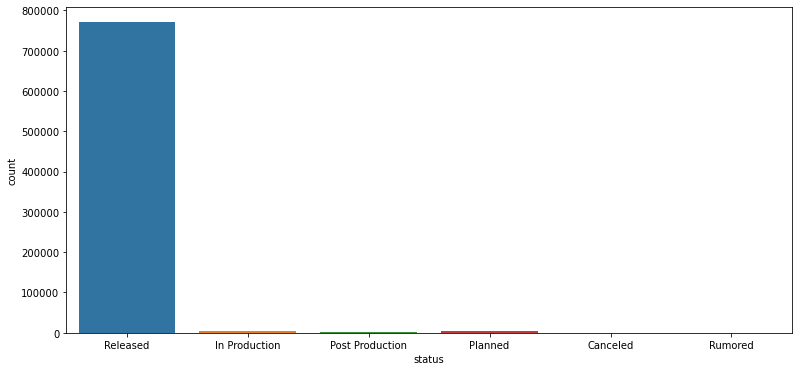

In [27]:
# Most of the films were released on time.
plt.figure(figsize=(13,6))
sns.countplot(x='status',data=df)

In [29]:
# Numerical & Categorical features
num=[feature for feature in df.columns if df[feature].dtype!= 'O']
print("Numerical Features :", num)

cate=[feature for feature in df.columns if df[feature].dtype== 'O']
print("Categorical Features :", cate)

Numerical Features : ['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
Categorical Features : ['title', 'genres', 'original_language', 'overview', 'production_companies', 'release_date', 'status', 'tagline', 'credits', 'keywords']


## Histogram Analysis

<AxesSubplot:xlabel='budget', ylabel='Density'>

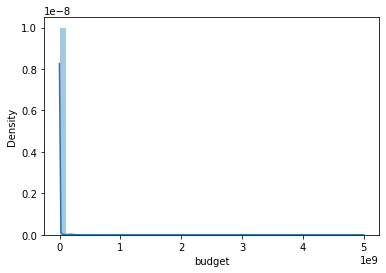

In [31]:
sns.distplot(df['budget'])

<AxesSubplot:xlabel='revenue', ylabel='Density'>

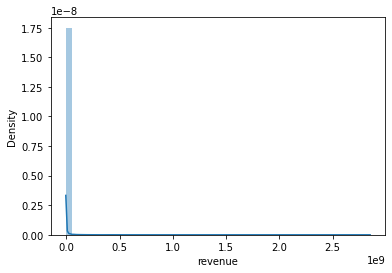

In [35]:
sns.distplot(df['revenue'])

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

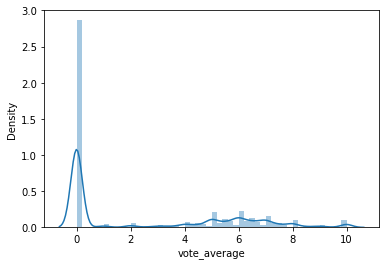

In [37]:
sns.distplot(df['vote_average'])

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

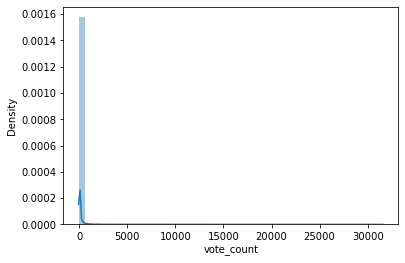

In [38]:
sns.distplot(df['vote_count'])

In [47]:
# Frequently repeated labels in numerical columns
cols2=df[['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count']]
for i in cols2:
    print('')
    print(i,":")
    print(df[i].value_counts())


popularity :
0.600      425631
1.400       19099
0.840       12153
0.841        3508
1.091        2298
            ...  
40.884          1
94.130          1
23.990          1
214.499         1
97.255          1
Name: popularity, Length: 20800, dtype: int64

budget :
0           740560
10000         1005
1000000        932
1000           764
5000           715
             ...  
287              1
798              1
10503445         1
4048037          1
4361898          1
Name: budget, Length: 4118, dtype: int64

revenue :
0           761573
1              174
100            140
100000         130
10000          101
             ...  
658000           1
17381942         1
24707633         1
5126264          1
183129           1
Name: revenue, Length: 12065, dtype: int64

runtime :
0.0       140844
90.0       26928
10.0       11757
85.0       11043
100.0      10961
           ...  
652.0          1
920.0          1
1749.0         1
653.0          1
468.0          1
Name: runtime, Length

In [42]:
len(df['popularity'].value_counts())

20800

- Every numerical columns contains more number of '0' labels than others, so that all columns getting skewedness in right side.
- It clearly shows that it is an imbalanced data set.
------------------

## Box plot Analysis

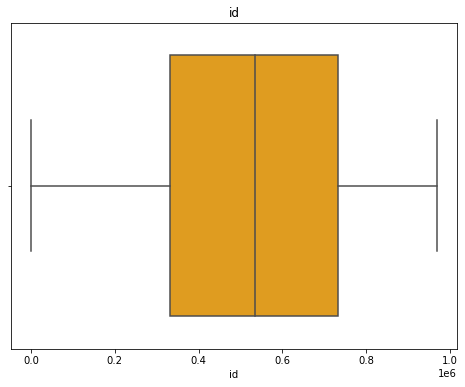

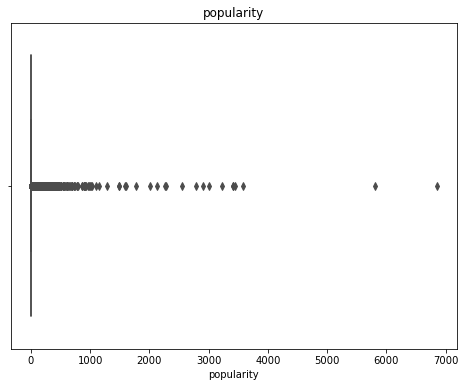

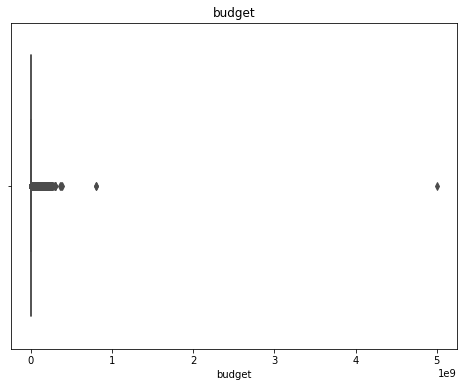

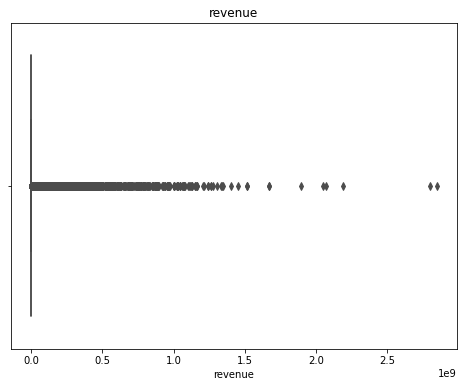

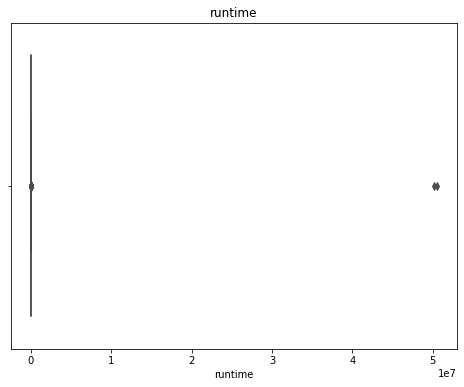

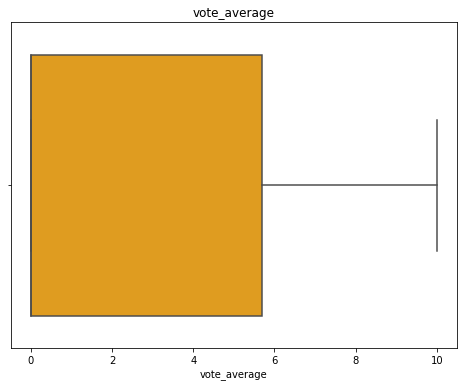

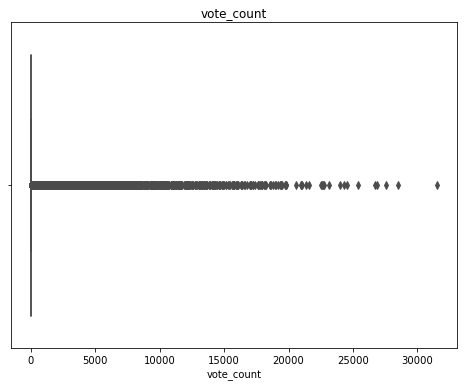

In [54]:
for i in num:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=i,data=df,color='orange')
    plt.title(i)
    plt.show()

- Except 'vote_average' column, all columns contains "Outliers"
-------------------

## Scatter plot Analysis

<AxesSubplot:xlabel='vote_count', ylabel='revenue'>

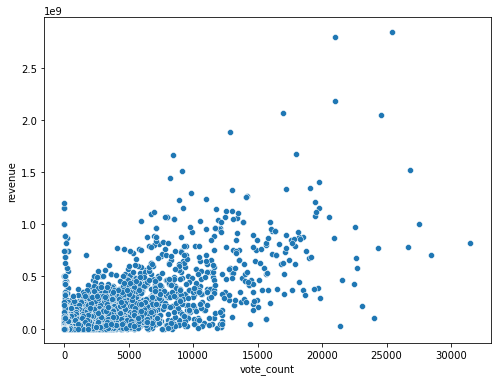

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='vote_count',y='revenue',data=df)

- There is a positive correlation between "revenue" and "vote_average" features
------------------

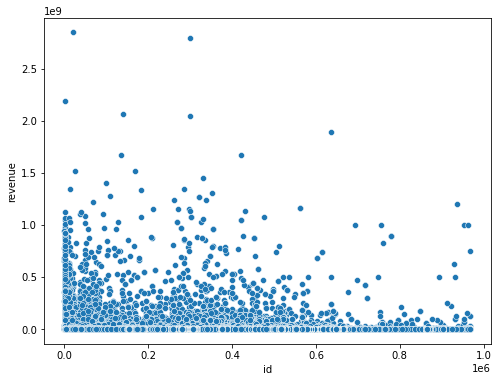

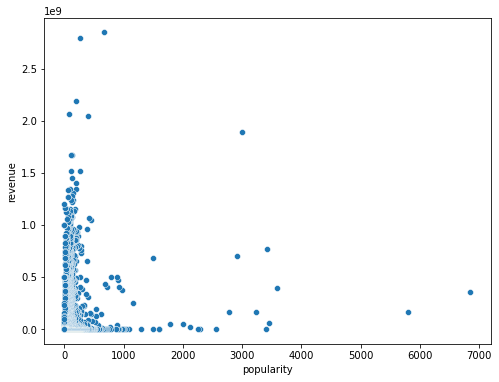

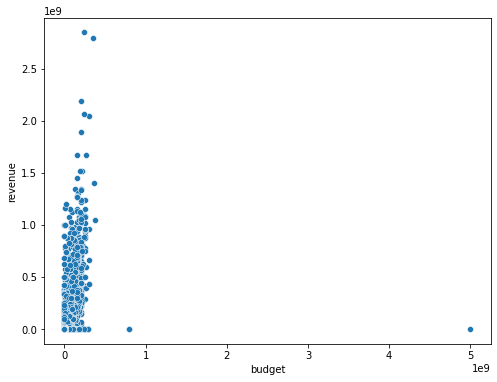

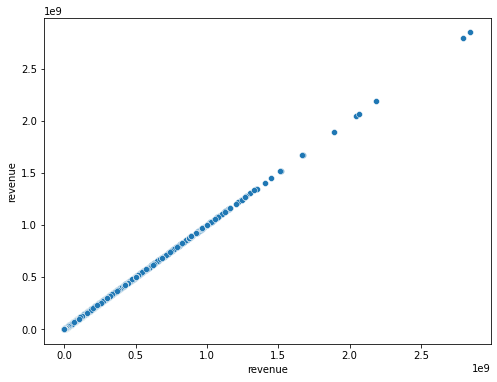

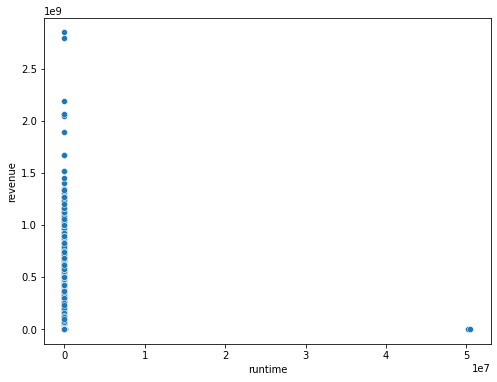

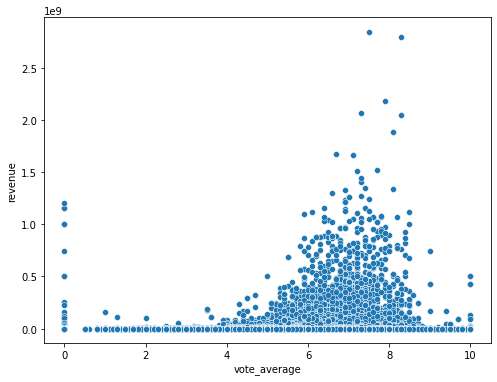

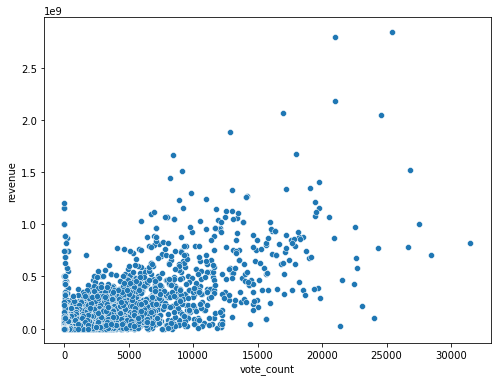

In [57]:
# Correlation between "revenue" and all columns
for i in num:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=i,y='revenue',data=df)
    plt.xlabel(i)
    plt.ylabel('revenue')
    plt.show()

## Heat Map

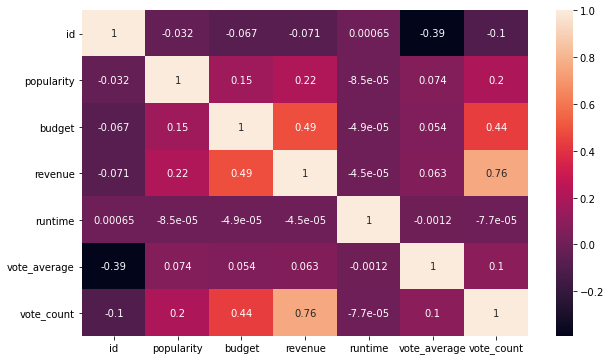

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()